In [15]:
!pip install tweepy
!pip install nltk

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
import re
import string

In [23]:
tweets_raw = pd.read_csv("my_data.csv")
tweets_raw

,id,createdAt,userName,fullText,replyTo,lang,quoteCount,retweetCount,replyCount,retweetCount.1,likeCount
0,1760585578595143772,Thu Feb 22 08:41:26 +0000 2024,spatialister,@ChatGPTapp @elonmusk Ls in the chat.,1.760585e+18,en,0,0,0,0,0
1,1760585572324704383,Thu Feb 22 08:41:25 +0000 2024,9595_swm,@ProjectAIice @unblogd @MGGA2021h @elonmusk th...,1.760566e+18,en,0,0,0,0,0
2,1760585565215584707,Thu Feb 22 08:41:23 +0000 2024,cheryle31060,@elonmusk Exactly the same thing happening in ...,1.760330e+18,en,0,0,0,0,0
3,1760585558965813645,Thu Feb 22 08:41:22 +0000 2024,JustInEchoes,"@ChatGPTapp @elonmusk Yes, it's real. You are ...",1.760585e+18,en,0,0,0,0,0
4,1760585558156333392,Thu Feb 22 08:41:21 +0000 2024,KnaryFeathers,@elonmusk Which AI do I ask about whether this...,1.760517e+18,en,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5009,1760565512486973945,Thu Feb 22 07:21:42 +0000 2024,NeverGaslightMe,@elonmusk You're an immigrant from Europe your...,1.760179e+18,en,0,0,0,0,0
5010,1760565510440374629,Thu Feb 22 07:21:42 +0000 2024,Michael_Lui0to1,@astro_greek @elonmusk 👍.,1.760535e+18,qme,0,0,0,0,3
5011,1760565509383405575,Thu Feb 22 07:21:41 +0000 2024,SamTwum,@ConnorEatsPants @elonmusk No need to apologis...,1.760519e+18,en,0,0,0,0,1
5012,1760565497165414862,Thu Feb 22 07:21:38 +0000 2024,7230Feliz,@elonmusk GROK!!.,1.760517e+18,en,0,0,0,0,0


In [34]:
# Tokenize fulltext
tknzr = TweetTokenizer()
tweets_raw['tokens'] = tweets_raw['fullText'].apply(tknzr.tokenize)
tweets_raw

,id,createdAt,userName,fullText,replyTo,lang,quoteCount,retweetCount,replyCount,retweetCount.1,likeCount,tokens
0,1760585578595143772,Thu Feb 22 08:41:26 +0000 2024,spatialister,@ChatGPTapp @elonmusk Ls in the chat.,1.760585e+18,en,0,0,0,0,0,"[@ChatGPTapp, @elonmusk, Ls, in, the, chat, .]"
1,1760585572324704383,Thu Feb 22 08:41:25 +0000 2024,9595_swm,@ProjectAIice @unblogd @MGGA2021h @elonmusk th...,1.760566e+18,en,0,0,0,0,0,"[@ProjectAIice, @unblogd, @MGGA2021h, @elonmus..."
2,1760585565215584707,Thu Feb 22 08:41:23 +0000 2024,cheryle31060,@elonmusk Exactly the same thing happening in ...,1.760330e+18,en,0,0,0,0,0,"[@elonmusk, Exactly, the, same, thing, happeni..."
3,1760585558965813645,Thu Feb 22 08:41:22 +0000 2024,JustInEchoes,"@ChatGPTapp @elonmusk Yes, it's real. You are ...",1.760585e+18,en,0,0,0,0,0,"[@ChatGPTapp, @elonmusk, Yes, ,, it's, real, ...."
4,1760585558156333392,Thu Feb 22 08:41:21 +0000 2024,KnaryFeathers,@elonmusk Which AI do I ask about whether this...,1.760517e+18,en,0,0,0,0,0,"[@elonmusk, Which, AI, do, I, ask, about, whet..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5009,1760565512486973945,Thu Feb 22 07:21:42 +0000 2024,NeverGaslightMe,@elonmusk You're an immigrant from Europe your...,1.760179e+18,en,0,0,0,0,0,"[@elonmusk, You're, an, immigrant, from, Europ..."
5010,1760565510440374629,Thu Feb 22 07:21:42 +0000 2024,Michael_Lui0to1,@astro_greek @elonmusk 👍.,1.760535e+18,qme,0,0,0,0,3,"[@astro_greek, @elonmusk, 👍, .]"
5011,1760565509383405575,Thu Feb 22 07:21:41 +0000 2024,SamTwum,@ConnorEatsPants @elonmusk No need to apologis...,1.760519e+18,en,0,0,0,0,1,"[@ConnorEatsPants, @elonmusk, No, need, to, ap..."
5012,1760565497165414862,Thu Feb 22 07:21:38 +0000 2024,7230Feliz,@elonmusk GROK!!.,1.760517e+18,en,0,0,0,0,0,"[@elonmusk, GROK, !, !, .]"


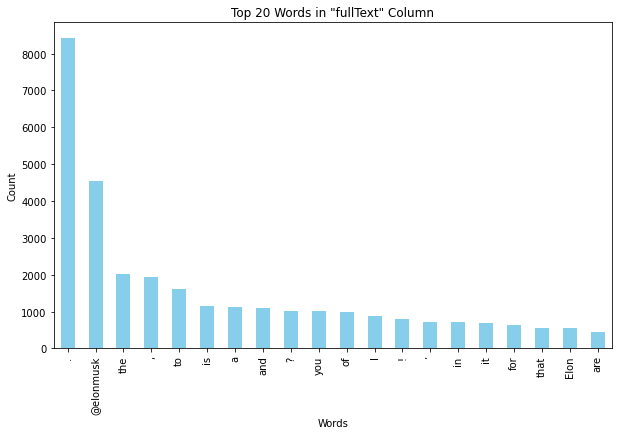

In [42]:
all_words = tweets_raw['tokens'].sum()
# words = word_tokenize(all_words)

# Create a Pandas Series with word counts
word_counts = pd.Series(all_words).value_counts()

# Plot a bar chart
top_words = 20  # Change this value based on how many top words you want to display
word_counts.head(top_words).plot(kind='bar', figsize=(10, 6), color='skyblue')

# Set plot labels and title
plt.xlabel('Words')
plt.ylabel('Count')
plt.title(f'Top {top_words} Words in "fullText" Column')

# Show the plot
plt.show()

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nathansoh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
stop_words = set(stopwords.words('english'))
all_words = ' '.join(tweets_raw['fullText'])
words = word_tokenize(all_words)
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

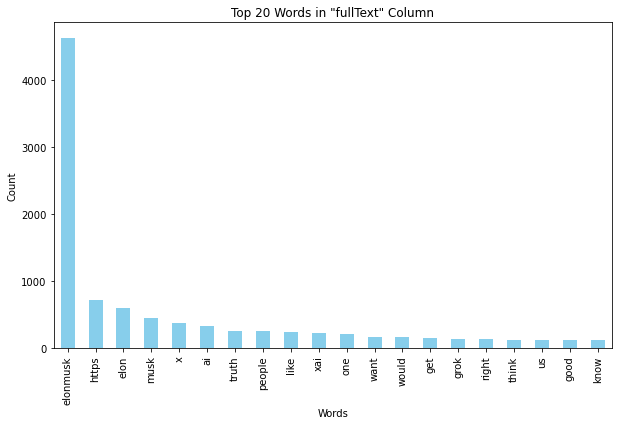

In [27]:
# Create a Pandas Series with word counts
word_counts = pd.Series(filtered_words).value_counts()

# Plot a bar chart
top_words = 20  # Change this value based on how many top words you want to display
word_counts.head(top_words).plot(kind='bar', figsize=(10, 6), color='skyblue')

# Set plot labels and title
plt.xlabel('Words')
plt.ylabel('Count')
plt.title(f'Top {top_words} Words in "fullText" Column')

# Show the plot
plt.show()


In [61]:
# Clean data
df_clean = pd.DataFrame()

# Make all tweets lower case
df_clean['tweet_text'] = tweets_raw['fullText'].str.lower()

# remove URLs
df_clean.tweet_text = df_clean.tweet_text.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
df_clean.tweet_text.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))

df_clean['tokens'] = df_clean['tweet_text'].apply(tknzr.tokenize)

# remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuations = list(string.punctuation)
punctuations.append('\'')

def remove_stopwords(word_list):
    return [w for w in word_list if w not in stop_words]

def remove_punctuation(word_list):
    return [w for w in word_list if w not in punctuations]

df_clean['tokens'] = df_clean['tokens'].apply(remove_stopwords)
df_clean['tokens'] = df_clean['tokens'].apply(remove_punctuation)

df_clean

,tweet_text,tokens
0,@chatgptapp @elonmusk ls in the chat.,"[@chatgptapp, @elonmusk, ls, chat]"
1,@projectaiice @unblogd @mgga2021h @elonmusk th...,"[@projectaiice, @unblogd, @mgga2021h, @elonmus..."
2,@elonmusk exactly the same thing happening in ...,"[@elonmusk, exactly, thing, happening, austral..."
3,"@chatgptapp @elonmusk yes, it's real. you are ...","[@chatgptapp, @elonmusk, yes, real, sorry, say..."
4,@elonmusk which ai do i ask about whether this...,"[@elonmusk, ai, ask, whether, accurate, repres..."
...,...,...
5009,@elonmusk you're an immigrant from europe your...,"[@elonmusk, immigrant, europe, worry, 10, 000,..."
5010,@astro_greek @elonmusk 👍.,"[@astro_greek, @elonmusk, 👍]"
5011,@connoreatspants @elonmusk no need to apologis...,"[@connoreatspants, @elonmusk, need, apologise,..."
5012,@elonmusk grok!!.,"[@elonmusk, grok]"


/Users/nathansoh/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


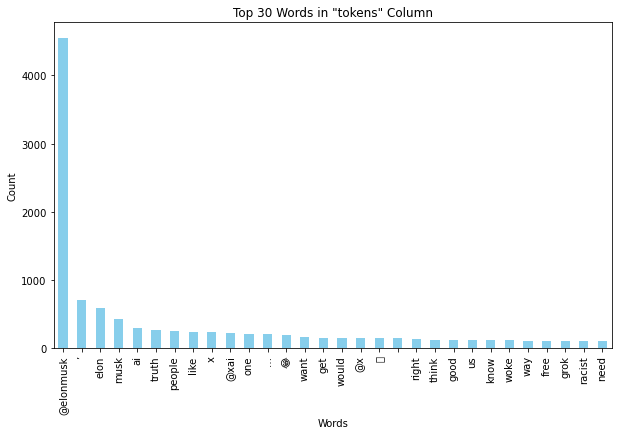

In [62]:
all_words = df_clean['tokens'].sum()

# Create a Pandas Series with word counts
word_counts = pd.Series(all_words).value_counts()

# Plot a bar chart
top_words = 30  # Change this value based on how many top words you want to display
word_counts.head(top_words).plot(kind='bar', figsize=(10, 6), color='skyblue')

# Set plot labels and title
plt.xlabel('Words')
plt.ylabel('Count')
plt.title(f'Top {top_words} Words in "tokens" Column')

# Show the plot
plt.show()